In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Unnamed: 0,Age,EstimatedSalary,Target
0,40,-1.017692,-1.548776,0
1,240,0.415005,2.327385,1
2,196,-0.731153,0.271845,0
3,294,-0.253587,-0.374182,0
4,306,1.274623,1.886912,0


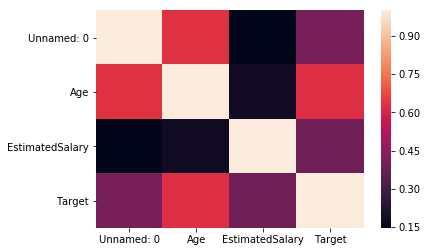

In [5]:
sns.heatmap(df.corr())

In [6]:
df.mean()

Unnamed: 0         204.128571
Age                  0.027835
EstimatedSalary      0.042065
Target               0.360714
dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [10]:
scaled_data = ss.fit_transform(df.drop('Target',axis=1))

F:\mandar_soft\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\mandar_soft\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
X = pd.DataFrame(data=scaled_data , columns=df.columns[:-1])

In [12]:
X.head()

,Unnamed: 0,Age,EstimatedSalary
0,-1.420262,-1.073271,-1.560098
1,0.310408,0.397443,2.241157
2,-0.070339,-0.779129,0.225340
3,0.777689,-0.288890,-0.408203
4,0.881529,1.279872,1.809196


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Target',axis=1),df['Target'],test_size=0.30)

In [15]:
from sklearn.svm import SVC

In [16]:
classifier = SVC()

In [18]:
classifier.fit(X_train,y_train)

F:\mandar_soft\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_pred)

In [22]:
cm

array([[50,  8],
       [19,  7]], dtype=int64)